# Try different models

This jupyter notebook is dedicated to training and evaluating different models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
import random

## 1. Open and view all the files

In [2]:
train=pd.read_csv('../data/flat_train.csv',index_col=0)
test=pd.read_csv('../data/flat_test.csv',index_col=0)
IC50=pd.read_csv('../data/flat_IC50.csv',index_col=0)
isolates_list = [line.rstrip('\n') for line in open('../data/isolates.txt')]
isolates_list_test = [line.rstrip('\n') for line in open('../data/isolates_test.txt')]
genes_column_labels_df=pd.read_csv('../data/genes_column_labels.csv',index_col=0)
genes_list = [line.rstrip('\n') for line in open('../data/genes_to_keep.txt')]

In [3]:
train.head()

,PF3D7_1340700_24HR_DHA,PF3D7_1340700_24HR_UT,PF3D7_1340700_6HR_DHA,PF3D7_1340700_6HR_UT,PF3D7_1246100_24HR_DHA,PF3D7_1246100_24HR_UT,PF3D7_1246100_6HR_DHA,PF3D7_1246100_6HR_UT,PF3D7_0106800_24HR_DHA,PF3D7_0106800_24HR_UT,...,PF3D7_0626800_DHA_UT_6HR,PF3D7_0626800_DHA_UT_24HR,PF3D7_1457000_24HR_6HR_DHA,PF3D7_1457000_24_6HR_UT,PF3D7_1457000_DHA_UT_6HR,PF3D7_1457000_DHA_UT_24HR,PF3D7_1361800_24HR_6HR_DHA,PF3D7_1361800_24_6HR_UT,PF3D7_1361800_DHA_UT_6HR,PF3D7_1361800_DHA_UT_24HR
isolate_01,-0.407052,-0.454890,0.240787,-0.323857,1.010718,1.297258,0.878644,0.462625,-0.174305,0.026291,...,-0.861167,-0.788560,-0.449115,0.103816,-0.387161,-0.940092,-0.204190,-0.306021,0.607113,0.708944
isolate_02,0.013135,-0.288905,0.156844,-0.258988,0.929380,1.122397,0.590085,1.358618,-0.556308,-0.449670,...,0.638573,-0.022643,-0.044861,-0.012785,0.488644,0.456568,-0.280932,0.137645,0.074284,-0.344293
isolate_03,0.048070,-0.340294,-0.135059,-0.284724,1.046211,1.230160,0.508137,0.867778,0.921045,-0.025513,...,1.312910,0.855652,-0.861166,0.302824,1.743635,0.579645,0.586608,-0.008594,-0.708807,-0.113605
isolate_04,-0.072510,-0.545671,-0.385077,-0.304287,0.965489,1.154897,0.879867,1.587606,0.367313,-0.390621,...,0.640146,-0.186046,-0.064471,0.092535,0.253309,0.096304,-0.065763,-1.011158,-0.072207,0.873189
isolate_05,-0.226061,-0.371508,-0.262047,-0.062498,1.234422,1.881968,1.436707,0.874129,-0.399773,-1.257496,...,-0.223396,1.337816,-0.006811,-1.209072,0.150276,1.352536,-0.197253,1.041507,0.677745,-0.561015


In [4]:
IC50.head()

,DHA_IC50
isolate_01,2.177
isolate_02,1.697
isolate_03,1.799
isolate_04,0.710
isolate_05,2.025


In [5]:
test.head()

,PF3D7_1340700_24HR_DHA,PF3D7_1340700_24HR_UT,PF3D7_1340700_6HR_DHA,PF3D7_1340700_6HR_UT,PF3D7_1246100_24HR_DHA,PF3D7_1246100_24HR_UT,PF3D7_1246100_6HR_DHA,PF3D7_1246100_6HR_UT,PF3D7_0106800_24HR_DHA,PF3D7_0106800_24HR_UT,...,PF3D7_0626800_DHA_UT_6HR,PF3D7_0626800_DHA_UT_24HR,PF3D7_1457000_24HR_6HR_DHA,PF3D7_1457000_24_6HR_UT,PF3D7_1457000_DHA_UT_6HR,PF3D7_1457000_DHA_UT_24HR,PF3D7_1361800_24HR_6HR_DHA,PF3D7_1361800_24_6HR_UT,PF3D7_1361800_DHA_UT_6HR,PF3D7_1361800_DHA_UT_24HR
isolate_31,-0.083810,-0.237601,-0.393627,0.157657,1.241742,0.892842,0.944031,1.185809,-0.584764,-1.392044,...,-1.183098,0.495186,0.059165,-0.586973,-0.565675,0.080463,-0.555443,0.797244,0.992569,-0.360118
isolate_32,-0.100321,-0.315922,-0.205521,-0.549832,0.499754,1.074672,0.484960,1.243588,-0.369133,0.305464,...,0.529374,0.228348,-0.479942,-0.070097,0.490606,0.080761,0.248413,-1.265139,-1.552093,-0.038541
isolate_33,-0.306169,-0.196336,-0.129218,-0.254396,1.711083,0.716859,0.887892,1.320313,0.176647,-1.046201,...,0.592113,0.538705,0.148453,-0.215818,-0.019406,0.344865,-0.061137,-0.450015,-0.265031,0.123846
isolate_34,0.108025,-0.107807,-0.210586,-0.346967,0.856864,0.916836,0.771997,1.151976,0.257807,0.219475,...,-0.041319,0.201217,0.477662,-0.799427,-1.046440,0.230649,-0.277628,0.877974,1.153233,-0.002368
isolate_35,-0.383524,-0.542011,-0.383707,-0.488203,1.240874,0.366477,0.248377,0.872176,-0.288073,0.539267,...,1.450840,-0.549614,-0.840660,1.094264,1.443738,-0.491185,1.181817,-0.896510,-2.229431,-0.151104


In [6]:
isolates_list

['isolate_01',
 'isolate_02',
 'isolate_03',
 'isolate_04',
 'isolate_05',
 'isolate_06',
 'isolate_07',
 'isolate_08',
 'isolate_09',
 'isolate_10',
 'isolate_11',
 'isolate_12',
 'isolate_13',
 'isolate_14',
 'isolate_15',
 'isolate_16',
 'isolate_17',
 'isolate_18',
 'isolate_19',
 'isolate_20',
 'isolate_21',
 'isolate_22',
 'isolate_23',
 'isolate_24',
 'isolate_25',
 'isolate_26',
 'isolate_27',
 'isolate_28',
 'isolate_29',
 'isolate_30']

In [7]:
genes_column_labels_df

,PF3D7_1340700,PF3D7_1246100,PF3D7_0106800,PF3D7_1431300,PF3D7_1426500,PF3D7_1216500,PF3D7_0418500,PF3D7_0821800,PF3D7_1432700,PF3D7_1463700,...,PF3D7_0417100,PF3D7_1332000,PF3D7_1204300,PF3D7_0729400,PF3D7_0820700,PF3D7_1320500,PF3D7_0109400,PF3D7_0626800,PF3D7_1457000,PF3D7_1361800
0,PF3D7_1340700_24HR_DHA,PF3D7_1246100_24HR_DHA,PF3D7_0106800_24HR_DHA,PF3D7_1431300_24HR_DHA,PF3D7_1426500_24HR_DHA,PF3D7_1216500_24HR_DHA,PF3D7_0418500_24HR_DHA,PF3D7_0821800_24HR_DHA,PF3D7_1432700_24HR_DHA,PF3D7_1463700_24HR_DHA,...,PF3D7_0417100_24HR_DHA,PF3D7_1332000_24HR_DHA,PF3D7_1204300_24HR_DHA,PF3D7_0729400_24HR_DHA,PF3D7_0820700_24HR_DHA,PF3D7_1320500_24HR_DHA,PF3D7_0109400_24HR_DHA,PF3D7_0626800_24HR_DHA,PF3D7_1457000_24HR_DHA,PF3D7_1361800_24HR_DHA
1,PF3D7_1340700_24HR_UT,PF3D7_1246100_24HR_UT,PF3D7_0106800_24HR_UT,PF3D7_1431300_24HR_UT,PF3D7_1426500_24HR_UT,PF3D7_1216500_24HR_UT,PF3D7_0418500_24HR_UT,PF3D7_0821800_24HR_UT,PF3D7_1432700_24HR_UT,PF3D7_1463700_24HR_UT,...,PF3D7_0417100_24HR_UT,PF3D7_1332000_24HR_UT,PF3D7_1204300_24HR_UT,PF3D7_0729400_24HR_UT,PF3D7_0820700_24HR_UT,PF3D7_1320500_24HR_UT,PF3D7_0109400_24HR_UT,PF3D7_0626800_24HR_UT,PF3D7_1457000_24HR_UT,PF3D7_1361800_24HR_UT
2,PF3D7_1340700_6HR_DHA,PF3D7_1246100_6HR_DHA,PF3D7_0106800_6HR_DHA,PF3D7_1431300_6HR_DHA,PF3D7_1426500_6HR_DHA,PF3D7_1216500_6HR_DHA,PF3D7_0418500_6HR_DHA,PF3D7_0821800_6HR_DHA,PF3D7_1432700_6HR_DHA,PF3D7_1463700_6HR_DHA,...,PF3D7_0417100_6HR_DHA,PF3D7_1332000_6HR_DHA,PF3D7_1204300_6HR_DHA,PF3D7_0729400_6HR_DHA,PF3D7_0820700_6HR_DHA,PF3D7_1320500_6HR_DHA,PF3D7_0109400_6HR_DHA,PF3D7_0626800_6HR_DHA,PF3D7_1457000_6HR_DHA,PF3D7_1361800_6HR_DHA
3,PF3D7_1340700_6HR_UT,PF3D7_1246100_6HR_UT,PF3D7_0106800_6HR_UT,PF3D7_1431300_6HR_UT,PF3D7_1426500_6HR_UT,PF3D7_1216500_6HR_UT,PF3D7_0418500_6HR_UT,PF3D7_0821800_6HR_UT,PF3D7_1432700_6HR_UT,PF3D7_1463700_6HR_UT,...,PF3D7_0417100_6HR_UT,PF3D7_1332000_6HR_UT,PF3D7_1204300_6HR_UT,PF3D7_0729400_6HR_UT,PF3D7_0820700_6HR_UT,PF3D7_1320500_6HR_UT,PF3D7_0109400_6HR_UT,PF3D7_0626800_6HR_UT,PF3D7_1457000_6HR_UT,PF3D7_1361800_6HR_UT
4,PF3D7_1340700_24HR_6HR_DHA,PF3D7_1246100_24HR_6HR_DHA,PF3D7_0106800_24HR_6HR_DHA,PF3D7_1431300_24HR_6HR_DHA,PF3D7_1426500_24HR_6HR_DHA,PF3D7_1216500_24HR_6HR_DHA,PF3D7_0418500_24HR_6HR_DHA,PF3D7_0821800_24HR_6HR_DHA,PF3D7_1432700_24HR_6HR_DHA,PF3D7_1463700_24HR_6HR_DHA,...,PF3D7_0417100_24HR_6HR_DHA,PF3D7_1332000_24HR_6HR_DHA,PF3D7_1204300_24HR_6HR_DHA,PF3D7_0729400_24HR_6HR_DHA,PF3D7_0820700_24HR_6HR_DHA,PF3D7_1320500_24HR_6HR_DHA,PF3D7_0109400_24HR_6HR_DHA,PF3D7_0626800_24HR_6HR_DHA,PF3D7_1457000_24HR_6HR_DHA,PF3D7_1361800_24HR_6HR_DHA
5,PF3D7_1340700_24_6HR_UT,PF3D7_1246100_24_6HR_UT,PF3D7_0106800_24_6HR_UT,PF3D7_1431300_24_6HR_UT,PF3D7_1426500_24_6HR_UT,PF3D7_1216500_24_6HR_UT,PF3D7_0418500_24_6HR_UT,PF3D7_0821800_24_6HR_UT,PF3D7_1432700_24_6HR_UT,PF3D7_1463700_24_6HR_UT,...,PF3D7_0417100_24_6HR_UT,PF3D7_1332000_24_6HR_UT,PF3D7_1204300_24_6HR_UT,PF3D7_0729400_24_6HR_UT,PF3D7_0820700_24_6HR_UT,PF3D7_1320500_24_6HR_UT,PF3D7_0109400_24_6HR_UT,PF3D7_0626800_24_6HR_UT,PF3D7_1457000_24_6HR_UT,PF3D7_1361800_24_6HR_UT
6,PF3D7_1340700_DHA_UT_6HR,PF3D7_1246100_DHA_UT_6HR,PF3D7_0106800_DHA_UT_6HR,PF3D7_1431300_DHA_UT_6HR,PF3D7_1426500_DHA_UT_6HR,PF3D7_1216500_DHA_UT_6HR,PF3D7_0418500_DHA_UT_6HR,PF3D7_0821800_DHA_UT_6HR,PF3D7_1432700_DHA_UT_6HR,PF3D7_1463700_DHA_UT_6HR,...,PF3D7_0417100_DHA_UT_6HR,PF3D7_1332000_DHA_UT_6HR,PF3D7_1204300_DHA_UT_6HR,PF3D7_0729400_DHA_UT_6HR,PF3D7_0820700_DHA_UT_6HR,PF3D7_1320500_DHA_UT_6HR,PF3D7_0109400_DHA_UT_6HR,PF3D7_0626800_DHA_UT_6HR,PF3D7_1457000_DHA_UT_6HR,PF3D7_1361800_DHA_UT_6HR
7,PF3D7_1340700_DHA_UT_24HR,PF3D7_1246100_DHA_UT_24HR,PF3D7_0106800_DHA_UT_24HR,PF3D7_1431300_DHA_UT_24HR,PF3D7_1426500_DHA_UT_24HR,PF3D7_1216500_DHA_UT_24HR,PF3D7_0418500_DHA_UT_24HR,PF3D7_0821800_DHA_UT_24HR,PF3D7_1432700_DHA_UT_24HR,PF3D7_1463700_DHA_UT_24HR,...,PF3D7_0417100_DHA_UT_24HR,PF3D7_1332000_DHA_UT_24HR,PF3D7_1204300_DHA_UT_24HR,PF3D7_0729400_DHA_UT_24HR,PF3D7_0820700_DHA_UT_24

## 2. Hacer modelo lineal de manera incremental (un gen con sus 8 valores a la vez)

### Isolates for validation
* isolate_07
* isolate_27
* isolate_18
* isolate_11
* isolate_16

### Models to try out
* [LASSO (R2)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
* [Linear Regression (RMSE)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### 2.1 Create the functions

In [55]:
#Global variables
#val_isolates
#genes_dict
val_isolates=['isolate_07','isolate_11','isolate_16','isolate_18','isolate_27']

In [10]:
def getGenesColumnLabels(genes):
#Takes a list of genes and returns the genes labels
    genes_list=[]
    for gene in genes:
        genes_list=genes_list+list(genes_column_labels_df[gene])
    return genes_list

In [11]:
def findTrainIsolates(val_isolates,df):
#Takes a list of isolates chosen to be the validation set and the train df.
#Returns the isolates not in val_isolates
    train_isolates=list(set(df.index)-set(val_isolates))
    train_isolates.sort()
    return train_isolates

In [12]:
def filterDfByIsolates(isolates,df):
#Takes a list of isolates and a dataframe
#Returns the rows of the dataframe whose index are in isolates
    filtered_df=df.loc[isolates]
    return filtered_df

In [13]:
def filterDfByGenes(genes,df):
#Takes a list of genes e.g.['PF3D7_1360200','PF3D7_1212800'] and a dataframe
#Returns the columns of the dataframe whose labels are in genes
    genes_to_filter=getGenesColumnLabels(genes)
    filtered_df=df[genes_to_filter]
    return filtered_df

In [14]:
def trainModel(genes,val_isolates,dfx,dfy):
    train_isolates=findTrainIsolates(val_isolates,dfx)
    
    X=filterDfByIsolates(train_isolates,dfx)
    X=filterDfByGenes(genes,X)
    
    y=filterDfByIsolates(train_isolates,dfy)
    
    model=LinearRegression().fit(X.values,y.values)
    
    X_val=filterDfByIsolates(val_isolates,dfx)
    X_val=filterDfByGenes(genes,X_val)
    
    y_val=filterDfByIsolates(val_isolates,dfy).values
    
    score=model.score(X_val,y_val)
    
    return score

### 2.2 Train the model using linear regression

In [44]:
selected_genes=[]
selected_scores=[0]
N=100
for i in range(N):
    best_gene_so_far=''
    best_score_so_far=selected_scores[-1]
    
    for gene in genes_list:
        
        if gene not in selected_genes:
            genes_to_use=selected_genes+[gene]
            
            model_score=trainModel(genes_to_use,val_isolates,train,IC50)
            
            if model_score > best_score_so_far:
                best_score_so_far=model_score
                best_gene_so_far=gene

    
    if best_score_so_far>selected_scores[-1]:
        selected_genes.append(best_gene_so_far)
        selected_scores.append(best_score_so_far)

In [16]:
selected_scores

[0, 0.7232934274782723, 0.9647245375940365, 0.9926399964586666]

<function matplotlib.pyplot.show(*args, **kw)>

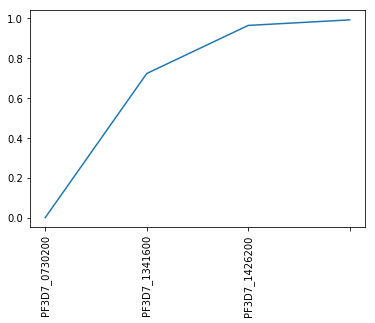

In [17]:
#N=100
x=np.arange(len(selected_scores))
y=selected_scores
plt.plot(x,y)
plt.xticks(x,selected_genes,rotation='vertical')
plt.show

### 2.3 Try the model with the three selected genes

In [18]:
selected_genes=['PF3D7_0730200','PF3D7_1341600','PF3D7_1426200']

In [19]:
def tryModel(genes,val_isolates,dfx,dfy):
    model_info={}
    
    train_isolates=findTrainIsolates(val_isolates,dfx)
    
    X=filterDfByIsolates(train_isolates,dfx)
    X=filterDfByGenes(genes,X)
    
    y=filterDfByIsolates(train_isolates,dfy)
    
    model=LinearRegression().fit(X.values,y.values)
    
    X_val=filterDfByIsolates(val_isolates,dfx)
    X_val=filterDfByGenes(genes,X_val)
    
    y_val=filterDfByIsolates(val_isolates,dfy).values
    
    y_pred=model.predict(X_val)
    
    score=model.score(X_val,y_val)
    
    model_info['y']=y.values
    model_info['y_val']=y_val
    model_info['X']=X.values
    model_info['X_val']=X_val
    model_info['y_pred']=y_pred
    model_info['score']=score
    return model_info

In [20]:
#Try the model with the first selected gene
gene=['PF3D7_0730200']

In [21]:
try_model=tryModel(selected_genes,val_isolates,train,IC50)

In [22]:
y=[try_model['y_val'][i][0] for i in range(len(try_model['y_val']))]
y_pred=[try_model['y_pred'][i][0] for i in range(len(try_model['y_pred']))]

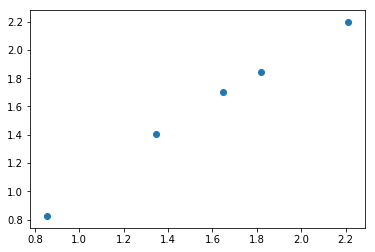

In [23]:
plt.scatter(y,y_pred)

### 2.4 Train the model with all the isolates and only the three selected genes

In [24]:
selected_genes

['PF3D7_0730200', 'PF3D7_1341600', 'PF3D7_1426200']

In [25]:
selected_train=train[getGenesColumnLabels(selected_genes)]
selected_train.head()

,PF3D7_0730200_24HR_DHA,PF3D7_0730200_24HR_UT,PF3D7_0730200_6HR_DHA,PF3D7_0730200_6HR_UT,PF3D7_0730200_24HR_6HR_DHA,PF3D7_0730200_24_6HR_UT,PF3D7_0730200_DHA_UT_6HR,PF3D7_0730200_DHA_UT_24HR,PF3D7_1341600_24HR_DHA,PF3D7_1341600_24HR_UT,...,PF3D7_1341600_DHA_UT_6HR,PF3D7_1341600_DHA_UT_24HR,PF3D7_1426200_24HR_DHA,PF3D7_1426200_24HR_UT,PF3D7_1426200_6HR_DHA,PF3D7_1426200_6HR_UT,PF3D7_1426200_24HR_6HR_DHA,PF3D7_1426200_24_6HR_UT,PF3D7_1426200_DHA_UT_6HR,PF3D7_1426200_DHA_UT_24HR
isolate_01,-0.037031,-0.073334,-0.530240,-0.245317,0.493209,0.171984,-0.284922,0.036303,0.188004,-0.787045,...,0.253384,0.975049,-0.128304,0.715598,0.011499,0.981056,-0.139804,-0.265458,-0.969557,-0.843902
isolate_02,-0.112674,-0.302915,-0.450089,-0.428044,0.337415,0.125129,-0.022045,0.190242,-0.517961,-0.480987,...,-0.250033,-0.036974,0.240229,0.013204,0.108668,0.220774,0.131561,-0.207570,-0.112106,0.227026
isolate_03,0.074458,-0.100457,0.117450,-0.109150,-0.042992,0.008693,0.226599,0.174914,-0.434341,0.022822,...,-0.940996,-0.457163,0.345671,-0.097277,0.413015,-0.258171,-0.067345,0.160894,0.671187,0.442948
isolate_04,-0.321503,-0.201828,-0.112915,-0.380831,-0.208588,0.179003,0.267916,-0.119675,-0.347945,-1.016586,...,0.370128,0.668641,0.017374,0.456434,-0.186565,-0.109549,0.203938,0.565983,-0.077016,-0.439060
isolate_05,-0.038549,-0.250931,-0.265711,-0.085343,0.227162,-0.165588,-0.180369,0.212381,-0.818626,-0.143570,...,0.805311,-0.675056,0.652695,-0.293320,0.351933,0.334961,0.300762,-0.628281,0.016973,0.946015


In [26]:
X=selected_train
y=IC50

model=LinearRegression().fit(X.values,y.values)

### 2.5 Save the model

In [27]:
from sklearn.externals import joblib
# Output a pickle file for the model
joblib.dump(model, '../models/model1_140719.pkl') 

['model1_140719.pkl']

## 3. Use the model1 on the test data

In [28]:
test.head()

,PF3D7_1340700_24HR_DHA,PF3D7_1340700_24HR_UT,PF3D7_1340700_6HR_DHA,PF3D7_1340700_6HR_UT,PF3D7_1246100_24HR_DHA,PF3D7_1246100_24HR_UT,PF3D7_1246100_6HR_DHA,PF3D7_1246100_6HR_UT,PF3D7_0106800_24HR_DHA,PF3D7_0106800_24HR_UT,...,PF3D7_0626800_DHA_UT_6HR,PF3D7_0626800_DHA_UT_24HR,PF3D7_1457000_24HR_6HR_DHA,PF3D7_1457000_24_6HR_UT,PF3D7_1457000_DHA_UT_6HR,PF3D7_1457000_DHA_UT_24HR,PF3D7_1361800_24HR_6HR_DHA,PF3D7_1361800_24_6HR_UT,PF3D7_1361800_DHA_UT_6HR,PF3D7_1361800_DHA_UT_24HR
isolate_31,-0.083810,-0.237601,-0.393627,0.157657,1.241742,0.892842,0.944031,1.185809,-0.584764,-1.392044,...,-1.183098,0.495186,0.059165,-0.586973,-0.565675,0.080463,-0.555443,0.797244,0.992569,-0.360118
isolate_32,-0.100321,-0.315922,-0.205521,-0.549832,0.499754,1.074672,0.484960,1.243588,-0.369133,0.305464,...,0.529374,0.228348,-0.479942,-0.070097,0.490606,0.080761,0.248413,-1.265139,-1.552093,-0.038541
isolate_33,-0.306169,-0.196336,-0.129218,-0.254396,1.711083,0.716859,0.887892,1.320313,0.176647,-1.046201,...,0.592113,0.538705,0.148453,-0.215818,-0.019406,0.344865,-0.061137,-0.450015,-0.265031,0.123846
isolate_34,0.108025,-0.107807,-0.210586,-0.346967,0.856864,0.916836,0.771997,1.151976,0.257807,0.219475,...,-0.041319,0.201217,0.477662,-0.799427,-1.046440,0.230649,-0.277628,0.877974,1.153233,-0.002368
isolate_35,-0.383524,-0.542011,-0.383707,-0.488203,1.240874,0.366477,0.248377,0.872176,-0.288073,0.539267,...,1.450840,-0.549614,-0.840660,1.094264,1.443738,-0.491185,1.181817,-0.896510,-2.229431,-0.151104


### 3.1 Make the IC50 predictions

In [29]:
#Load the model
model_load = joblib.load('../models/model1_140719.pkl') 

In [30]:
selected_test=test[getGenesColumnLabels(selected_genes)]
selected_test.head()

,PF3D7_0730200_24HR_DHA,PF3D7_0730200_24HR_UT,PF3D7_0730200_6HR_DHA,PF3D7_0730200_6HR_UT,PF3D7_0730200_24HR_6HR_DHA,PF3D7_0730200_24_6HR_UT,PF3D7_0730200_DHA_UT_6HR,PF3D7_0730200_DHA_UT_24HR,PF3D7_1341600_24HR_DHA,PF3D7_1341600_24HR_UT,...,PF3D7_1341600_DHA_UT_6HR,PF3D7_1341600_DHA_UT_24HR,PF3D7_1426200_24HR_DHA,PF3D7_1426200_24HR_UT,PF3D7_1426200_6HR_DHA,PF3D7_1426200_6HR_UT,PF3D7_1426200_24HR_6HR_DHA,PF3D7_1426200_24_6HR_UT,PF3D7_1426200_DHA_UT_6HR,PF3D7_1426200_DHA_UT_24HR
isolate_31,-0.703596,-0.700134,-0.272551,-0.040702,-0.431046,-0.659432,-0.231848,-0.003463,-0.858399,-0.277527,...,0.178323,-0.580871,0.329245,0.178702,0.371113,0.707257,-0.041868,-0.528555,-0.336144,0.150544
isolate_32,-0.347220,-0.008325,-0.213340,-0.346004,-0.133880,0.337679,0.132664,-0.338894,-0.599167,-0.773197,...,-0.168488,0.174030,0.645354,0.735466,0.810575,0.376228,-0.165220,0.359238,0.434347,-0.090111
isolate_33,0.047989,-0.684308,-0.351197,-0.047073,0.399185,-0.637235,-0.304124,0.732297,-0.082528,-0.173893,...,0.422157,0.091365,0.018793,0.287341,0.440818,-0.049872,-0.422026,0.337213,0.490690,-0.268549
isolate_34,-0.664713,-0.401648,-0.273990,0.010716,-0.390724,-0.412364,-0.284705,-0.263065,-0.406698,-0.458120,...,0.479332,0.051422,0.170532,0.075933,0.375788,0.925295,-0.205256,-0.849361,-0.549507,0.094599
isolate_35,-0.312158,-0.053026,0.007652,-0.213307,-0.319810,0.160280,0.220958,-0.259132,-0.379456,-0.656161,...,-0.798243,0.276706,0.186138,0.498472,1.244600,-0.329952,-1.058462,0.828424,1.574552,-0.312334


In [31]:
X_test=selected_test
X_test.head()

,PF3D7_0730200_24HR_DHA,PF3D7_0730200_24HR_UT,PF3D7_0730200_6HR_DHA,PF3D7_0730200_6HR_UT,PF3D7_0730200_24HR_6HR_DHA,PF3D7_0730200_24_6HR_UT,PF3D7_0730200_DHA_UT_6HR,PF3D7_0730200_DHA_UT_24HR,PF3D7_1341600_24HR_DHA,PF3D7_1341600_24HR_UT,...,PF3D7_1341600_DHA_UT_6HR,PF3D7_1341600_DHA_UT_24HR,PF3D7_1426200_24HR_DHA,PF3D7_1426200_24HR_UT,PF3D7_1426200_6HR_DHA,PF3D7_1426200_6HR_UT,PF3D7_1426200_24HR_6HR_DHA,PF3D7_1426200_24_6HR_UT,PF3D7_1426200_DHA_UT_6HR,PF3D7_1426200_DHA_UT_24HR
isolate_31,-0.703596,-0.700134,-0.272551,-0.040702,-0.431046,-0.659432,-0.231848,-0.003463,-0.858399,-0.277527,...,0.178323,-0.580871,0.329245,0.178702,0.371113,0.707257,-0.041868,-0.528555,-0.336144,0.150544
isolate_32,-0.347220,-0.008325,-0.213340,-0.346004,-0.133880,0.337679,0.132664,-0.338894,-0.599167,-0.773197,...,-0.168488,0.174030,0.645354,0.735466,0.810575,0.376228,-0.165220,0.359238,0.434347,-0.090111
isolate_33,0.047989,-0.684308,-0.351197,-0.047073,0.399185,-0.637235,-0.304124,0.732297,-0.082528,-0.173893,...,0.422157,0.091365,0.018793,0.287341,0.440818,-0.049872,-0.422026,0.337213,0.490690,-0.268549
isolate_34,-0.664713,-0.401648,-0.273990,0.010716,-0.390724,-0.412364,-0.284705,-0.263065,-0.406698,-0.458120,...,0.479332,0.051422,0.170532,0.075933,0.375788,0.925295,-0.205256,-0.849361,-0.549507,0.094599
isolate_35,-0.312158,-0.053026,0.007652,-0.213307,-0.319810,0.160280,0.220958,-0.259132,-0.379456,-0.656161,...,-0.798243,0.276706,0.186138,0.498472,1.244600,-0.329952,-1.058462,0.828424,1.574552,-0.312334


In [32]:
IC50_pred=model_load.predict(X_test)

### 3.2 Format the predictions for submission

In [33]:
temp_list=[]
for value in IC50_pred:
    temp_list.append(value[0])
IC50_pred=temp_list

In [34]:
submission=pd.DataFrame({'Isolate':isolates_list_test,'Predicted_IC50':IC50_pred})

In [35]:
submission.head()

,Isolate,Predicted_IC50
0,isolate_31,[1.6437809715876175]
1,isolate_32,[1.2973943249476458]
2,isolate_33,[2.0784638284435824]
3,isolate_34,[1.460311533172019]
4,isolate_35,[0.5425151896322731]


### 3.3 Save submissions to file

In [36]:
#submission.to_csv('../submissions/lylat_SubCh1_model1_140719.txt', sep='\t',index=None)

## 4. Confirm that the deltas improve the score of the model

Run section 2.2 again but now each gene of the train set will have four columns ingoring the 4 columns correspondint to the differecial between the isolates sampling condition.

## 4.1 Modify getGenesColumns

In [37]:
genes_column_labels_df.loc[0:3]

,PF3D7_1340700,PF3D7_1246100,PF3D7_0106800,PF3D7_1431300,PF3D7_1426500,PF3D7_1216500,PF3D7_0418500,PF3D7_0821800,PF3D7_1432700,PF3D7_1463700,...,PF3D7_0417100,PF3D7_1332000,PF3D7_1204300,PF3D7_0729400,PF3D7_0820700,PF3D7_1320500,PF3D7_0109400,PF3D7_0626800,PF3D7_1457000,PF3D7_1361800
0,PF3D7_1340700_24HR_DHA,PF3D7_1246100_24HR_DHA,PF3D7_0106800_24HR_DHA,PF3D7_1431300_24HR_DHA,PF3D7_1426500_24HR_DHA,PF3D7_1216500_24HR_DHA,PF3D7_0418500_24HR_DHA,PF3D7_0821800_24HR_DHA,PF3D7_1432700_24HR_DHA,PF3D7_1463700_24HR_DHA,...,PF3D7_0417100_24HR_DHA,PF3D7_1332000_24HR_DHA,PF3D7_1204300_24HR_DHA,PF3D7_0729400_24HR_DHA,PF3D7_0820700_24HR_DHA,PF3D7_1320500_24HR_DHA,PF3D7_0109400_24HR_DHA,PF3D7_0626800_24HR_DHA,PF3D7_1457000_24HR_DHA,PF3D7_1361800_24HR_DHA
1,PF3D7_1340700_24HR_UT,PF3D7_1246100_24HR_UT,PF3D7_0106800_24HR_UT,PF3D7_1431300_24HR_UT,PF3D7_1426500_24HR_UT,PF3D7_1216500_24HR_UT,PF3D7_0418500_24HR_UT,PF3D7_0821800_24HR_UT,PF3D7_1432700_24HR_UT,PF3D7_1463700_24HR_UT,...,PF3D7_0417100_24HR_UT,PF3D7_1332000_24HR_UT,PF3D7_1204300_24HR_UT,PF3D7_0729400_24HR_UT,PF3D7_0820700_24HR_UT,PF3D7_1320500_24HR_UT,PF3D7_0109400_24HR_UT,PF3D7_0626800_24HR_UT,PF3D7_1457000_24HR_UT,PF3D7_1361800_24HR_UT
2,PF3D7_1340700_6HR_DHA,PF3D7_1246100_6HR_DHA,PF3D7_0106800_6HR_DHA,PF3D7_1431300_6HR_DHA,PF3D7_1426500_6HR_DHA,PF3D7_1216500_6HR_DHA,PF3D7_0418500_6HR_DHA,PF3D7_0821800_6HR_DHA,PF3D7_1432700_6HR_DHA,PF3D7_1463700_6HR_DHA,...,PF3D7_0417100_6HR_DHA,PF3D7_1332000_6HR_DHA,PF3D7_1204300_6HR_DHA,PF3D7_0729400_6HR_DHA,PF3D7_0820700_6HR_DHA,PF3D7_1320500_6HR_DHA,PF3D7_0109400_6HR_DHA,PF3D7_0626800_6HR_DHA,PF3D7_1457000_6HR_DHA,PF3D7_1361800_6HR_DHA
3,PF3D7_1340700_6HR_UT,PF3D7_1246100_6HR_UT,PF3D7_0106800_6HR_UT,PF3D7_1431300_6HR_UT,PF3D7_1426500_6HR_UT,PF3D7_1216500_6HR_UT,PF3D7_0418500_6HR_UT,PF3D7_0821800_6HR_UT,PF3D7_1432700_6HR_UT,PF3D7_1463700_6HR_UT,...,PF3D7_0417100_6HR_UT,PF3D7_1332000_6HR_UT,PF3D7_1204300_6HR_UT,PF3D7_0729400_6HR_UT,PF3D7_0820700_6HR_UT,PF3D7_1320500_6HR_UT,PF3D7_0109400_6HR_UT,PF3D7_0626800_6HR_UT,PF3D7_1457000_6HR_UT,PF3D7_1361800_6HR_UT


In [38]:
def getGenesColumnLabels2(genes):
    genes_list=[]
    for gene in genes:
        genes_list=genes_list+list(genes_column_labels_df[gene][0:4])
    return genes_list

In [39]:
def filterDfByGenes2(genes,df):
    #genes is a list of genes: e.g.['PF3D7_1360200','PF3D7_1212800']
    genes_to_filter=getGenesColumnLabels2(genes)
    filtered_df=df[genes_to_filter]
    return filtered_df

In [40]:
def trainModel(genes,val_isolates,dfx,dfy):
    train_isolates=findTrainIsolates(val_isolates,dfx)
    
    X=filterDfByIsolates(train_isolates,dfx)
    X=filterDfByGenes2(genes,X)
    
    y=filterDfByIsolates(train_isolates,dfy)
    
    model=LinearRegression().fit(X.values,y.values)
    
    X_val=filterDfByIsolates(val_isolates,dfx)
    X_val=filterDfByGenes2(genes,X_val)
    
    y_val=filterDfByIsolates(val_isolates,dfy).values
    
    score=model.score(X_val,y_val)
    
    return score

In [41]:
selected_genes=[]
selected_scores=[0]
N=10
for i in range(N):
    best_gene_so_far=''
    best_score_so_far=selected_scores[-1]
    
    for gene in genes_list:
        
        if gene not in selected_genes:
            genes_to_use=selected_genes+[gene]
            
            model_score=trainModel(genes_to_use,val_isolates,train,IC50)
            
            if model_score > best_score_so_far:
                best_score_so_far=model_score
                best_gene_so_far=gene

    
    if best_score_so_far>selected_scores[-1]:
        selected_genes.append(best_gene_so_far)
        selected_scores.append(best_score_so_far)

([<matplotlib.axis.XTick at 0x186bd3800b8>,
 <a list of 3 Text xticklabel objects>)

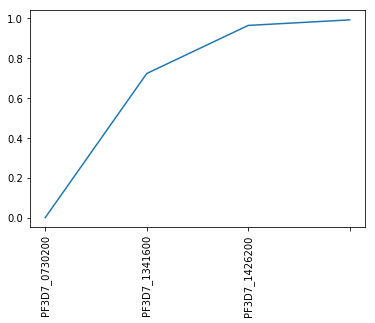

In [42]:
#N=100
x=np.arange(len(selected_scores))
y=selected_scores
plt.plot(x,y)
plt.xticks(x,selected_genes,rotation='vertical')


In [43]:
selected_scores

[0, 0.7232934274782725, 0.9647245375940361, 0.9926399964586666]

Conclussion: The differential don't improve the model

### 5. Validate the model

Train the same model choosing different validation sets each time

In [97]:
new_val_isolates=[]
val_isolate_list=[]
val_score_list=[]
val_genes_list=[]

M=100

for i in range(M):
    new_val_isolates=random.sample(isolates_list,5)
    
    #Train model to find the best combination of genes for the new_val_isolates
    selected_genes=[]
    selected_scores=[0]
    N=10
    
    for i in range(N):
        best_gene_so_far=''
        best_score_so_far=selected_scores[-1]

        for gene in genes_list:

            if gene not in selected_genes:
                genes_to_use=selected_genes+[gene]

                model_score=trainModel(genes_to_use,new_val_isolates,train,IC50)

                if model_score > best_score_so_far:
                    best_score_so_far=model_score
                    best_gene_so_far=gene


        if best_score_so_far>selected_scores[-1]:
            selected_genes.append(best_gene_so_far)
            selected_scores.append(best_score_so_far)
    
    val_isolate_list.append(new_val_isolates)
    val_score_list.append(selected_scores)
    val_genes_list.append(selected_genes)
    
    
    

In [98]:
val_genes_list

[['PF3D7_1146900', 'PF3D7_1238800', 'PF3D7_1466400'],
 ['PF3D7_1120100', 'PF3D7_0211400', 'PF3D7_1466700'],
 ['PF3D7_1233000', 'PF3D7_0321200', 'PF3D7_0210000'],
 ['PF3D7_1116600', 'PF3D7_1235400', 'PF3D7_1347200'],
 ['PF3D7_1125400',
  'PF3D7_1116600',
  'PF3D7_0618900',
  'PF3D7_1338200',
  'PF3D7_1128700'],
 ['PF3D7_0110100', 'PF3D7_1342800', 'PF3D7_1242800'],
 ['PF3D7_1244800', 'PF3D7_1314600'],
 ['PF3D7_1306400', 'PF3D7_0630500', 'PF3D7_1215300'],
 ['PF3D7_0104200', 'PF3D7_1137800', 'PF3D7_1116400'],
 ['PF3D7_1120100', 'PF3D7_1469000', 'PF3D7_1361400'],
 ['PF3D7_1250600', 'PF3D7_1313000', 'PF3D7_1431300'],
 ['PF3D7_1423000', 'PF3D7_1463500', 'PF3D7_1122100'],
 ['PF3D7_0826700', 'PF3D7_1233000', 'PF3D7_0905900', 'PF3D7_0317800'],
 ['PF3D7_0910600', 'PF3D7_1312400', 'PF3D7_0932200', 'PF3D7_1365400'],
 ['PF3D7_1253400', 'PF3D7_0110100', 'PF3D7_1342500', 'PF3D7_1245100'],
 ['PF3D7_0910600', 'PF3D7_0602400', 'PF3D7_0210000'],
 ['PF3D7_1120100', 'PF3D7_1223900', 'PF3D7_1426300', 'PF3D7_

In [99]:
val_isolate_list

[['isolate_15', 'isolate_01', 'isolate_23', 'isolate_06', 'isolate_22'],
 ['isolate_26', 'isolate_13', 'isolate_28', 'isolate_22', 'isolate_15'],
 ['isolate_15', 'isolate_29', 'isolate_13', 'isolate_30', 'isolate_19'],
 ['isolate_14', 'isolate_22', 'isolate_24', 'isolate_01', 'isolate_02'],
 ['isolate_21', 'isolate_17', 'isolate_06', 'isolate_16', 'isolate_08'],
 ['isolate_11', 'isolate_26', 'isolate_01', 'isolate_06', 'isolate_12'],
 ['isolate_10', 'isolate_11', 'isolate_22', 'isolate_02', 'isolate_13'],
 ['isolate_11', 'isolate_20', 'isolate_27', 'isolate_29', 'isolate_03'],
 ['isolate_04', 'isolate_25', 'isolate_21', 'isolate_03', 'isolate_20'],
 ['isolate_29', 'isolate_15', 'isolate_19', 'isolate_14', 'isolate_03'],
 ['isolate_21', 'isolate_25', 'isolate_26', 'isolate_10', 'isolate_24'],
 ['isolate_13', 'isolate_05', 'isolate_15', 'isolate_18', 'isolate_21'],
 ['isolate_25', 'isolate_19', 'isolate_27', 'isolate_23', 'isolate_11'],
 ['isolate_04', 'isolate_24', 'isolate_29', 'isolat

In [100]:
val_score_list

[[0, 0.5195809416289303, 0.9281491820161777, 0.9793301860619373],
 [0, 0.4483364826074798, 0.9832159487710083, 0.9870875241147318],
 [0, 0.6951994862645282, 0.9752734137957766, 0.9841568498471672],
 [0, 0.6360934445237498, 0.937008514885735, 0.9476953639581859],
 [0,
  0.2453629210613023,
  0.6041600210315757,
  0.7934385773565162,
  0.9563291568400897,
  0.9859842661399524],
 [0, 0.8823818126175157, 0.9362931525276543, 0.9565054133942235],
 [0, 0.6868841438579272, 0.7909778617326363],
 [0, 0.5483821627254787, 0.9048602586655828, 0.9475032335027815],
 [0, 0.4444546450869403, 0.8695181147391521, 0.9870914246409505],
 [0, 0.6291234748421055, 0.9470738718531436, 0.9910007023233705],
 [0, 0.5481295238917404, 0.9431592801143093, 0.9864979718035864],
 [0, 0.6960079402005919, 0.9550323315115614, 0.964064848859248],
 [0,
  0.6958419297886438,
  0.8949418241536097,
  0.9596341699289495,
  0.9713137338546476],
 [0,
  0.4882857024351246,
  0.8283404740452238,
  0.9909998645578842,
  0.99471081565

### 6. Train model using LASSO

In [106]:
from sklearn import linear_model

In [101]:
#Global variables
#val_isolates
#genes_dict
val_isolates=['isolate_07','isolate_11','isolate_16','isolate_18','isolate_27']

### 6.1 Define the new train function

In [107]:
def trainModelLASSO(genes,val_isolates,dfx,dfy):
    train_isolates=findTrainIsolates(val_isolates,dfx)
    
    X=filterDfByIsolates(train_isolates,dfx)
    X=filterDfByGenes(genes,X)
    
    y=filterDfByIsolates(train_isolates,dfy)
    
    model=linear_model.Lasso(alpha=0.1).fit(X.values,y.values)
    
    X_val=filterDfByIsolates(val_isolates,dfx)
    X_val=filterDfByGenes(genes,X_val)
    
    y_val=filterDfByIsolates(val_isolates,dfy).values
    
    score=model.score(X_val,y_val)
    
    return score

### 6.2 Train the model using linear regression

In [117]:
selected_genes=[]
selected_scores=[0]
N=20
for i in range(N):
    best_gene_so_far=''
    best_score_so_far=selected_scores[-1]
    
    for gene in genes_list:
        
        if gene not in selected_genes:
            genes_to_use=selected_genes+[gene]
            
            model_score=trainModelLASSO(genes_to_use,val_isolates,train,IC50)
            
            if model_score > best_score_so_far:
                best_score_so_far=model_score
                best_gene_so_far=gene

    
    if best_score_so_far>selected_scores[-1]:
        selected_genes.append(best_gene_so_far)
        selected_scores.append(best_score_so_far)

In [114]:
selected_scores

[0,
 0.2530370211698727,
 0.4599599236123799,
 0.5826717331695985,
 0.6559621390951622,
 0.6937164634972335,
 0.6982359507405541,
 0.6982487787599694,
 0.6982492605426571]

In [118]:
selected_genes

['PF3D7_1418100',
 'PF3D7_0223100',
 'PF3D7_0731500',
 'PF3D7_0801300',
 'PF3D7_1223900',
 'PF3D7_1335900',
 'PF3D7_1428300',
 'PF3D7_0602400']

<function matplotlib.pyplot.show(*args, **kw)>

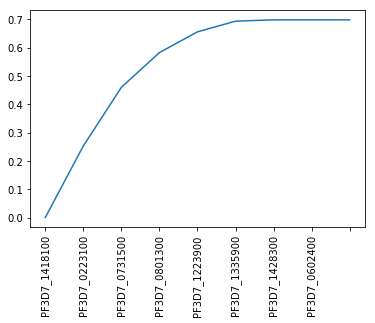

In [119]:
#N=100
x=np.arange(len(selected_scores))
y=selected_scores
plt.plot(x,y)
plt.xticks(x,selected_genes,rotation='vertical')
plt.show

###  6.3 Try the model with the new selected genes

In [124]:
def tryModelLASSO(genes,val_isolates,dfx,dfy):
    model_info={}
    
    train_isolates=findTrainIsolates(val_isolates,dfx)
    
    X=filterDfByIsolates(train_isolates,dfx)
    X=filterDfByGenes(genes,X)
    
    y=filterDfByIsolates(train_isolates,dfy)
    
    model=linear_model.Lasso(alpha=0.1).fit(X.values,y.values)
    
    X_val=filterDfByIsolates(val_isolates,dfx)
    X_val=filterDfByGenes(genes,X_val)
    
    y_val=filterDfByIsolates(val_isolates,dfy).values
    
    y_pred=model.predict(X_val)
    
    score=model.score(X_val,y_val)
    
    model_info['y']=y.values
    model_info['y_val']=y_val
    model_info['X']=X.values
    model_info['X_val']=X_val
    model_info['y_pred']=y_pred
    model_info['score']=score
    return model_info

In [20]:
#Try the model with the first selected gene
gene=['PF3D7_0730200']

In [125]:
try_model=tryModelLASSO(selected_genes,val_isolates,train,IC50)

In [126]:
try_model['y_val']

array([[0.8567],
       [1.82  ],
       [2.21  ],
       [1.647 ],
       [1.348 ]])

In [127]:
try_model['y_pred']

array([1.16248361, 1.6723602 , 1.80485489, 1.69374343, 1.52394784])

In [128]:
y=[try_model['y_val'][i][0] for i in range(len(try_model['y_val']))]
y_pred=try_model['y_pred']

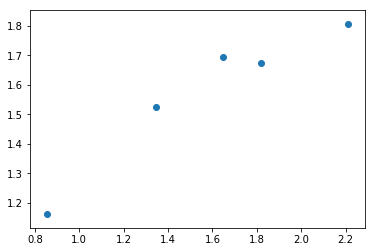

In [129]:
plt.scatter(y,y_pred)

### 7. Train model using linear regression and all the genes without the diferentials

In [130]:
val_isolates

['isolate_07', 'isolate_11', 'isolate_16', 'isolate_18', 'isolate_27']

In [131]:
genes_list

['PF3D7_1340700',
 'PF3D7_1246100',
 'PF3D7_0106800',
 'PF3D7_1431300',
 'PF3D7_1426500',
 'PF3D7_1216500',
 'PF3D7_0418500',
 'PF3D7_0821800',
 'PF3D7_1432700',
 'PF3D7_1463700',
 'PF3D7_1329100',
 'PF3D7_1032500',
 'PF3D7_0319600',
 'PF3D7_0503100',
 'PF3D7_0813800',
 'PF3D7_0415400',
 'PF3D7_1423000',
 'PF3D7_1223900',
 'PF3D7_0321200',
 'PF3D7_1220900',
 'PF3D7_1034400',
 'PF3D7_0211400',
 'PF3D7_0708500',
 'PF3D7_1211000',
 'PF3D7_1418100',
 'PF3D7_1437700',
 'PF3D7_0729900',
 'PF3D7_1426300',
 'PF3D7_1134000',
 'PF3D7_0807300',
 'PF3D7_1302200',
 'PF3D7_0805200',
 'PF3D7_0816000',
 'PF3D7_0909200',
 'PF3D7_1251200',
 'PF3D7_0826100',
 'PF3D7_1446600',
 'PF3D7_0820200',
 'PF3D7_1144900',
 'PF3D7_0826700',
 'PF3D7_0711000',
 'PF3D7_1209900',
 'PF3D7_0206200',
 'PF3D7_1246200',
 'PF3D7_1119500',
 'PF3D7_1121700',
 'PF3D7_0211600',
 'PF3D7_1141600',
 'PF3D7_1360500',
 'PF3D7_1008400',
 'PF3D7_1471100',
 'PF3D7_1311400',
 'PF3D7_1250100',
 'PF3D7_1245100',
 'PF3D7_0209000',
 'PF3D7_06

In [132]:
X=train
y=IC50

model=LinearRegression().fit(X.values,y.values)

In [133]:
from sklearn.externals import joblib
# Output a pickle file for the model
joblib.dump(model, 'model2_220719.pkl') 

['model2_220719.pkl']

### 7.1 Use the model2 on the test data

In [134]:
test.head()

,PF3D7_1340700_24HR_DHA,PF3D7_1340700_24HR_UT,PF3D7_1340700_6HR_DHA,PF3D7_1340700_6HR_UT,PF3D7_1246100_24HR_DHA,PF3D7_1246100_24HR_UT,PF3D7_1246100_6HR_DHA,PF3D7_1246100_6HR_UT,PF3D7_0106800_24HR_DHA,PF3D7_0106800_24HR_UT,...,PF3D7_0626800_DHA_UT_6HR,PF3D7_0626800_DHA_UT_24HR,PF3D7_1457000_24HR_6HR_DHA,PF3D7_1457000_24_6HR_UT,PF3D7_1457000_DHA_UT_6HR,PF3D7_1457000_DHA_UT_24HR,PF3D7_1361800_24HR_6HR_DHA,PF3D7_1361800_24_6HR_UT,PF3D7_1361800_DHA_UT_6HR,PF3D7_1361800_DHA_UT_24HR
isolate_31,-0.083810,-0.237601,-0.393627,0.157657,1.241742,0.892842,0.944031,1.185809,-0.584764,-1.392044,...,-1.183098,0.495186,0.059165,-0.586973,-0.565675,0.080463,-0.555443,0.797244,0.992569,-0.360118
isolate_32,-0.100321,-0.315922,-0.205521,-0.549832,0.499754,1.074672,0.484960,1.243588,-0.369133,0.305464,...,0.529374,0.228348,-0.479942,-0.070097,0.490606,0.080761,0.248413,-1.265139,-1.552093,-0.038541
isolate_33,-0.306169,-0.196336,-0.129218,-0.254396,1.711083,0.716859,0.887892,1.320313,0.176647,-1.046201,...,0.592113,0.538705,0.148453,-0.215818,-0.019406,0.344865,-0.061137,-0.450015,-0.265031,0.123846
isolate_34,0.108025,-0.107807,-0.210586,-0.346967,0.856864,0.916836,0.771997,1.151976,0.257807,0.219475,...,-0.041319,0.201217,0.477662,-0.799427,-1.046440,0.230649,-0.277628,0.877974,1.153233,-0.002368
isolate_35,-0.383524,-0.542011,-0.383707,-0.488203,1.240874,0.366477,0.248377,0.872176,-0.288073,0.539267,...,1.450840,-0.549614,-0.840660,1.094264,1.443738,-0.491185,1.181817,-0.896510,-2.229431,-0.151104


### 7.2 Make the IC50 predictions

In [135]:
#Load the model
model_load = joblib.load('../models/model2_220719.pkl') 

In [136]:
X_test=test
X_test.head()

,PF3D7_1340700_24HR_DHA,PF3D7_1340700_24HR_UT,PF3D7_1340700_6HR_DHA,PF3D7_1340700_6HR_UT,PF3D7_1246100_24HR_DHA,PF3D7_1246100_24HR_UT,PF3D7_1246100_6HR_DHA,PF3D7_1246100_6HR_UT,PF3D7_0106800_24HR_DHA,PF3D7_0106800_24HR_UT,...,PF3D7_0626800_DHA_UT_6HR,PF3D7_0626800_DHA_UT_24HR,PF3D7_1457000_24HR_6HR_DHA,PF3D7_1457000_24_6HR_UT,PF3D7_1457000_DHA_UT_6HR,PF3D7_1457000_DHA_UT_24HR,PF3D7_1361800_24HR_6HR_DHA,PF3D7_1361800_24_6HR_UT,PF3D7_1361800_DHA_UT_6HR,PF3D7_1361800_DHA_UT_24HR
isolate_31,-0.083810,-0.237601,-0.393627,0.157657,1.241742,0.892842,0.944031,1.185809,-0.584764,-1.392044,...,-1.183098,0.495186,0.059165,-0.586973,-0.565675,0.080463,-0.555443,0.797244,0.992569,-0.360118
isolate_32,-0.100321,-0.315922,-0.205521,-0.549832,0.499754,1.074672,0.484960,1.243588,-0.369133,0.305464,...,0.529374,0.228348,-0.479942,-0.070097,0.490606,0.080761,0.248413,-1.265139,-1.552093,-0.038541
isolate_33,-0.306169,-0.196336,-0.129218,-0.254396,1.711083,0.716859,0.887892,1.320313,0.176647,-1.046201,...,0.592113,0.538705,0.148453,-0.215818,-0.019406,0.344865,-0.061137,-0.450015,-0.265031,0.123846
isolate_34,0.108025,-0.107807,-0.210586,-0.346967,0.856864,0.916836,0.771997,1.151976,0.257807,0.219475,...,-0.041319,0.201217,0.477662,-0.799427,-1.046440,0.230649,-0.277628,0.877974,1.153233,-0.002368
isolate_35,-0.383524,-0.542011,-0.383707,-0.488203,1.240874,0.366477,0.248377,0.872176,-0.288073,0.539267,...,1.450840,-0.549614,-0.840660,1.094264,1.443738,-0.491185,1.181817,-0.896510,-2.229431,-0.151104


In [150]:
IC50_pred=model_load.predict(X_test)

### 7.3 Format the predictions for submission

In [154]:
temp_list=[]
for value in IC50_pred:
    temp_list.append(value[0])
IC50_pred=temp_list

In [155]:
submission=pd.DataFrame({'Isolate':isolates_list_test,'Predicted_IC50':IC50_pred})

In [156]:
submission.head()

,Isolate,Predicted_IC50
0,isolate_31,1.963126
1,isolate_32,1.476340
2,isolate_33,1.001944
3,isolate_34,2.349245
4,isolate_35,0.566230


### 3.3 Save submissions to file

In [157]:
submission.to_csv('../submissions/lylat_SubCh1_model2_220719.txt', sep='\t',index=None)

# 8. Train models using LARS

Train the data that has all the genes as pre-prossed in section 5.1 for the **data_explore** notebook

In [7]:
Alltrain=pd.read_csv('../data/flat_Alltrain.csv', index_col=0 )
Alltest=pd.read_csv('../data/flat_Alltest.csv', index_col=0 )
IC50=pd.read_csv('../data/flat_IC50.csv',index_col=0)

In [4]:
from sklearn import linear_model
reg = linear_model.Lars(n_nonzero_coefs=1)

In [5]:
X=Alltrain.values
y=[v[0] for v in IC50.values]

In [6]:
reg.fit(X,y)

Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
   fit_path=True, n_nonzero_coefs=1, normalize=True, positive=False,
   precompute='auto', verbose=False)

In [11]:
from sklearn.externals import joblib
# Output a pickle file for the model
joblib.dump(reg, '../models/model3_140819.pkl') 

['../models/model3_140819.pkl']

### 8.1 Use the model3 on the test data

Use Test data that has all the genes as pre-prossed in section 5.2 for the **data_explore** notebook

In [9]:
Alltest.head()

,MAL1.465720.465873.bc..rv.._24HR_DHA,MAL1.465720.465873.bc..rv.._24HR_UT,MAL1.465720.465873.bc..rv.._6HR_DHA,MAL1.465720.465873.bc..rv.._6HR_UT,MAL1.48287.48430....kr...can_24HR_DHA,MAL1.48287.48430....kr...can_24HR_UT,MAL1.48287.48430....kr...can_6HR_DHA,MAL1.48287.48430....kr...can_6HR_UT,MAL1.562126.562246.bc..r..._24HR_DHA,MAL1.562126.562246.bc..r..._24HR_UT,...,PF3D7_1479900_6HR_DHA,PF3D7_1479900_6HR_UT,PF3D7_1480000_24HR_DHA,PF3D7_1480000_24HR_UT,PF3D7_1480000_6HR_DHA,PF3D7_1480000_6HR_UT,PF3D7_1480100_24HR_DHA,PF3D7_1480100_24HR_UT,PF3D7_1480100_6HR_DHA,PF3D7_1480100_6HR_UT
isolate_31,0.331889,0.384609,0.127538,0.770151,-2.240666,-1.148180,-1.429485,-1.250674,-1.374813,-0.415748,...,-1.587528,-1.321217,-4.372933,-5.052881,-4.948757,-4.029268,-1.714546,-1.106747,-1.524659,-2.091407
isolate_32,0.292870,0.212604,0.488279,-0.270898,-1.708955,-1.877999,-1.579333,-0.894499,-1.075350,-1.759377,...,-1.536142,-1.653011,-4.991477,-4.190220,-4.295806,-4.647708,-2.409299,-2.240881,-2.134556,-0.594054
isolate_33,0.302845,-0.373568,-0.022357,0.356370,-1.573917,-1.747897,-1.292145,-1.916230,-1.283210,-0.042734,...,-2.008126,-1.283603,-4.789230,-4.215403,-4.265268,-3.698062,-2.349921,-0.950303,-1.778473,-0.490212
isolate_34,0.138070,0.352066,-0.304539,0.411080,-2.104094,-1.905021,-1.757525,-1.927857,-1.267395,-1.527366,...,-1.289212,-2.489302,-3.553589,-3.480636,-5.401736,-4.154778,-1.451041,-1.425710,-0.562436,-1.825506
isolate_35,0.317207,0.379982,0.612449,-0.338538,-1.397006,-1.509501,-2.228005,-1.759452,-1.095190,-1.678029,...,-2.643800,-1.427714,-3.432687,-5.218094,-4.269741,-4.324910,-1.446432,-2.176601,-2.230341,-2.021473


### 8.2 Make the IC50 predictions

In [12]:
#Load the model
model_load = joblib.load('../models/model3_140819.pkl') 

In [13]:
X_test=Alltest.values

In [14]:
IC50_pred=model_load.predict(X_test)

In [15]:
IC50

,DHA_IC50
isolate_01,2.1770
isolate_02,1.6970
isolate_03,1.7990
isolate_04,0.7100
isolate_05,2.0250
isolate_06,1.3670
isolate_07,0.8567
isolate_08,3.4600
isolate_09,1.7650
isolate_10,1.7540


In [16]:
IC50_pred

array([1.58317504, 1.5841044 , 1.593098  , 1.59373276, 1.57822571,
       1.59130793, 1.58787105, 1.57895285, 1.57903926, 1.58676688,
       1.58695743, 1.58891316, 1.59393108, 1.58533034, 1.59227686,
       1.59133918, 1.58907755, 1.58614805, 1.58598201, 1.58821712,
       1.58638861, 1.58698062, 1.59469182, 1.59610786, 1.59349301])

### 8.3 Perform crossvalidation

Perform crossvalidation on 

In [17]:
from sklearn.model_selection import cross_validate

In [19]:
reg = linear_model.Lars(n_nonzero_coefs=1)
scores = cross_validate(reg, X,y, scoring='r2', cv=5)

In [26]:
scores['test_score']

array([-0.10452661, -0.2185645 , -0.24557277, -0.15977527, -0.76671702])

In [27]:
scores['train_score']

array([0.13598446, 0.06139339, 0.12145691, 0.00727816, 0.05903198])

# 9. Train models using LARS after PCA

Train the data that has all the genes as and whose features have been reduced using PCA as pre-prossed in section 6.3 in the **data_explore** notebook

In [42]:
train_PCA_30=pd.read_csv('../data/Alltrain_PCA_30.csv', index_col=0 )
test_PCA_30=pd.read_csv('../data/Alltest_PCA_30.csv', index_col=0 )
IC50=pd.read_csv('../data/flat_IC50.csv',index_col=0)

In [43]:
X=train_PCA_30.values
X_test=test_PCA_30
y=IC50.values

### 9.1 Perform crossvalidation

Perform crossvalidation on 

In [44]:
reg = linear_model.Lars(n_nonzero_coefs=1)
scores = cross_validate(reg, X,y, scoring='r2', cv=5)

In [45]:
scores['test_score']

array([-0.13275322, -0.14981445, -0.14457485, -0.19670003, -0.95705979])

In [46]:
scores['train_score']

C:\Users\Public\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


array([0.08596497, 0.10205859, 0.10587242, 0.02399014, 0.04038882])

Conclussion: This model doesn't perfom well because all training scores are below 0.1 and the test scores are about -0.15 with the exception of one that is very good (-0.95). However, to say that it is a good model all test scores must be similar and high.